In [10]:
import pandas as pd
import networkx as nx

In [11]:
data = pd.read_csv('airports.csv')
G = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)

In [13]:
import matplotlib.pyplot as plt


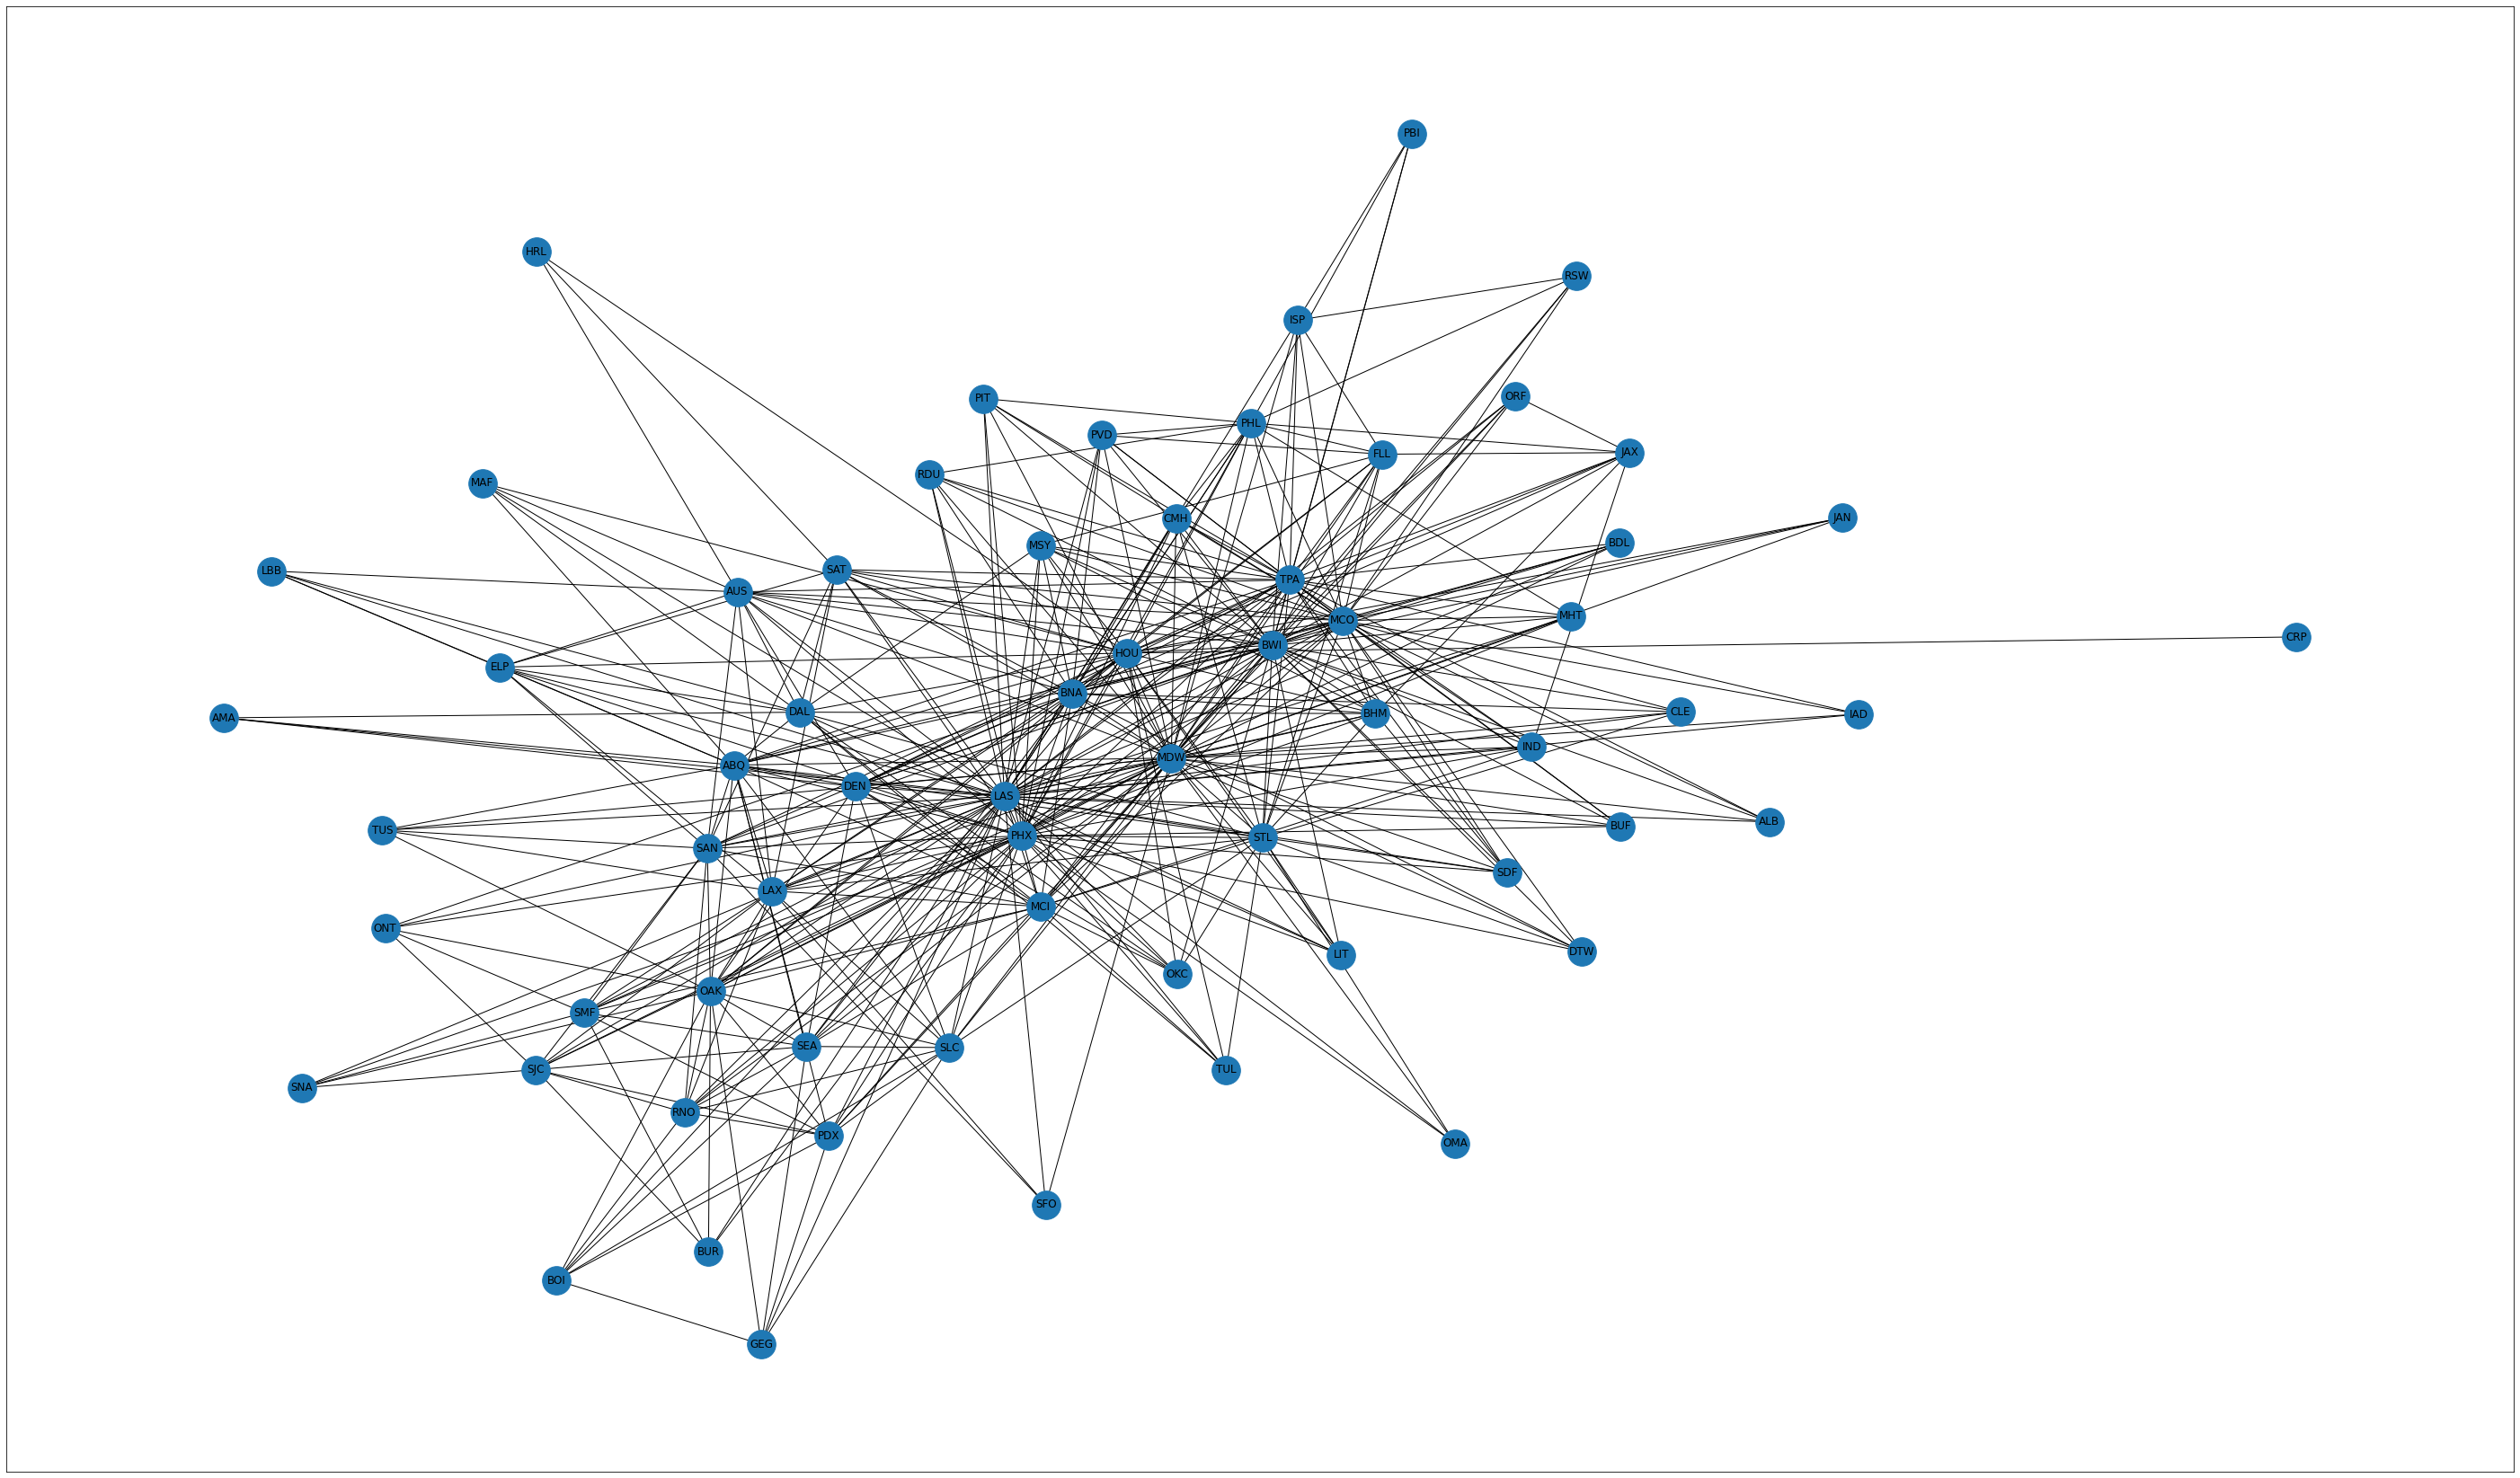

In [31]:
plt.figure(figsize=(50,30))
nx.draw_networkx(G, with_labels=True, node_size=1000)
plt.show()

In [19]:
def dfs(start, end, path=None):
    if path is None:
        path = []

    if start in path:
        return None

    path.append(start)

    if start == end:
        return path

    start_nb = G.neighbors(start)
    end_nb = G.neighbors(end)

    for node in start_nb:
        if dfs(node, end, path):
            return path

    return None

In [20]:
def path_distance(start, end):
    path = dfs(start, end)
    return sum(G[node_a][node_b]['Distance'] for node_a, node_b in zip(path, path[1:]))

In [21]:
def path_air_time(start, end):
    path = dfs(start, end)
    return sum(G[node_a][node_b]['AirTime'] for node_a, node_b in zip(path, path[1:]))

In [22]:
print('Path from ISP to JAP', dfs('ISP', 'JAN'))
print('Distance from ISP to JAP', path_distance('ISP', 'JAN'))
print('Air time from ISP to JAP', path_air_time('ISP', 'JAN'))

Path from ISP to JAP ['ISP', 'BWI', 'IND', 'JAX', 'BHM', 'LAS', 'ABQ', 'LAX', 'AUS', 'LBB', 'DAL', 'LIT', 'HOU', 'JAN']
Distance from ISP to JAP 7494
Air time from ISP to JAP 1037.0
